In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [27]:
data = pd.read_csv("./data/selected_data.csv")
data = data.dropna()
data.rename(columns={'y': 'subscribed'}, inplace=True)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13216 entries, 0 to 13215
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             13216 non-null  int64  
 1   job             13216 non-null  object 
 2   marital         13216 non-null  object 
 3   education       13216 non-null  object 
 4   default         13216 non-null  object 
 5   housing         13216 non-null  object 
 6   loan            13216 non-null  object 
 7   contact         13216 non-null  object 
 8   month           13216 non-null  object 
 9   day_of_week     13216 non-null  object 
 10  campaign        13216 non-null  int64  
 11  pdays           13216 non-null  int64  
 12  previous        13216 non-null  int64  
 13  poutcome        13216 non-null  object 
 14  emp.var.rate    13216 non-null  float64
 15  cons.price.idx  13216 non-null  float64
 16  cons.conf.idx   13216 non-null  float64
 17  euribor3m       13216 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
0,38,services,married,high.school,no,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01
1,33,blue-collar,married,basic.6y,no,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,yes,2009,2009-04-01
2,43,self-employed,married,high.school,unknown,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01
3,31,technician,married,professional.course,no,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01
4,43,self-employed,married,high.school,unknown,no,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01


In [10]:
def separate_variables(df):
    numeric_vars = df.select_dtypes(include=['float64', 'int64'])
    categorical_vars = df.select_dtypes(include=['object'])
    return numeric_vars, categorical_vars

numeric_df, categorical_df = separate_variables(data)

In [35]:
def plot_boxplot(data, column):
    plt.figure(figsize=(8, 10))  
    sns.boxplot(y=column, data=data) 
    plt.title(f'Boxplot of {column}', fontsize=14)  
    plt.ylabel(column, fontsize=12)  
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10) 
    plt.show()

3.0 999.0
Before:


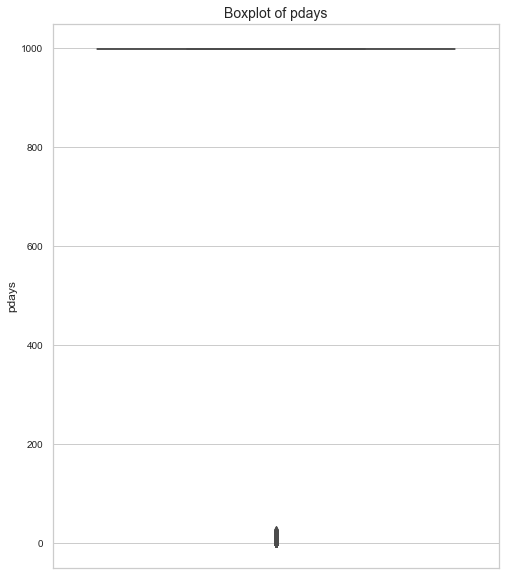

After:


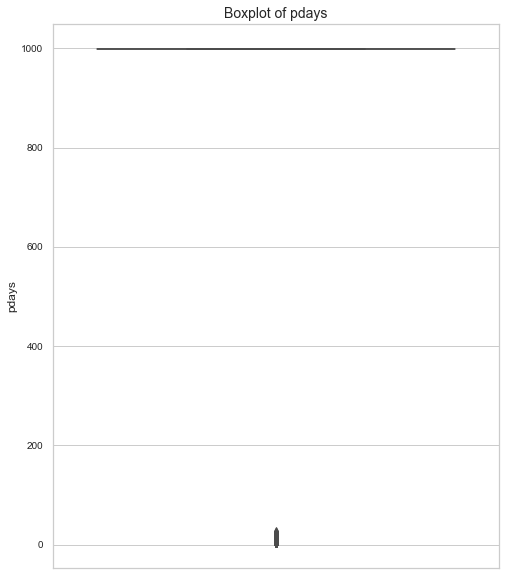

In [40]:
# age, campaign

current_col_name = 'pdays'
lower = data[current_col_name].quantile(0.025) # 5th quantile
upper = data[current_col_name].quantile(0.975) # 95th quantile
print(lower,upper)

print('Before:')
plot_boxplot(data,current_col_name)

data[current_col_name].clip(lower, upper, inplace=True)

print('After:')
plot_boxplot(data,current_col_name)


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13216 entries, 0 to 13215
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             13216 non-null  float64
 1   job             13216 non-null  object 
 2   marital         13216 non-null  object 
 3   education       13216 non-null  object 
 4   default         13216 non-null  object 
 5   housing         13216 non-null  object 
 6   loan            13216 non-null  object 
 7   contact         13216 non-null  object 
 8   month           13216 non-null  object 
 9   day_of_week     13216 non-null  object 
 10  campaign        13216 non-null  float64
 11  pdays           13216 non-null  float64
 12  previous        13216 non-null  float64
 13  poutcome        13216 non-null  object 
 14  emp.var.rate    13216 non-null  float64
 15  cons.price.idx  13216 non-null  float64
 16  cons.conf.idx   13216 non-null  float64
 17  euribor3m       13216 non-null 

In [44]:
data.to_csv('./data/clean_data.csv', index=False)